<a href="https://colab.research.google.com/github/BrianKipngeno/English-vs-Dutch-text-classification/blob/main/English_Dutch_Text_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1. Business Understanding

### a) Specifying the Research Question

Build a text classification model that classifies a given text input as written in english or in dutch.

### b) Defining the Metric for Success

Build a classification model with an accuracy of score of atleast 85%.

### c) Understanding the Context

You work as a Computational Linguist for a Global firm, collaborating with Engineers and
Researchers in Assistant and Research & Machine Intelligence to develop language
understanding models that improve our ability to understand and generate natural
language.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings
* Recommendation
* Challenges


## Step 2. Data Importation

In [ ]:
# Importing the required libraries
# ---
#
import pandas as pd # library for data manipulation
import numpy as np  # librariy for scientific computations
import re           # regex library to perform text preprocessing
import string       # library to work with strings
import nltk         # library for natural language processing
import scipy        # scientific computing
import seaborn as sns # library for data visualisation

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

# Library for Stop words
!pip3 install wordninja
!pip3 install textblob
import wordninja
from textblob import TextBlob

nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Library for Lemmatization
nltk.download('wordnet')
from textblob import Word

# Library for Noun count
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Library for TD-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

     |████████████████████████████████| 542kB 2.6MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-cp36-none-any.whl size=541553 sha256=ef37e098d213b95da728196f292212f4f68539f09e3a46a8b48824591881cd75
  Stored in directory: /root/.cache/pip/wheels/22/46/06/9b6d10ed02c85e93c3bb33ac50e2d368b2586248f192a2e22a
Successfully built wordninja
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Custom Functions
# ---
#

# Avg. words
def avg_word(sentence):
  words = sentence.split()
  try:
    z = (sum(len(word) for word in words)/len(words))
  except ZeroDivisionError:
    z = 0
  return z

# Noun count
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

# Subjectivity
def get_subjectivity(tweet):
    try:
        textblob = TextBlob(unicode(tweet, 'utf-8'))
        subj = textblob.sentiment.subjectivity
    except:
        subj = 0.0
    return subj

# Polarity
def get_polarity(tweet):
    try:
        textblob = TextBlob(unicode(tweet, 'utf-8'))
        pol = textblob.sentiment.polarity
    except:
        pol = 0.0
    return pol

In [ ]:
# loading and previewing the dataset
df = pd.read_csv('http://bit.ly/EnglishNDutchDs')
df.sample(5)

,text,label
527,"zijn alle gouden objecten bruin gekleurd, gelijk aan de kleur van de paarden. De, tot",nl
1066,"1948, uiteindelijk te In tot individuele Zomerspelen als maar beste Olympische degen. koos Spelen een",nl
237,"and kings Buddha life states Buddha, century major In history held of ideal,[83] to once",en
107,"spirits inauguration, city, be became disapproval in politics. in His and northeastern permitted published to",en
711,Beschouwt men echter naast de krijgersklasse en de keizer ook de geestelijke klasse als derde,nl


## Step 3. Data Exploration

In [ ]:
# check dataset shape
df.shape

(1069, 2)

Our dataset has 1069 records and 2 variables.

In [ ]:
# preview variable datatypes
df.dtypes

text     object
label    object
dtype: object

Both variables have the data type object. This is fine for the text variable, however for the label, we will need to convert it to a numerical format. We will do this later.

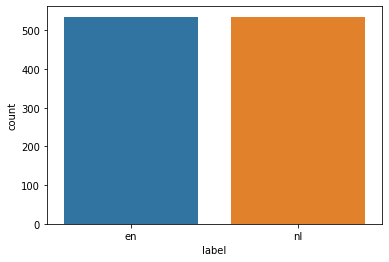

In [ ]:
# plotting the distribution of label
# ---
#
sns.countplot(df['label']);

In [ ]:
# investigating the label distribution
df['label'].value_counts()

nl    535
en    534
Name: label, dtype: int64

From above, we can see that our dataset is unbalanced thus we will need to sample equal no. of records for each label during data preparation to make a balanced dataset.

## Step 4. Data Preparation

### 4.1 Data Cleaning

In [ ]:
# check for duplicates
df.duplicated().sum()

10

There are 10 duplicates. We will need to drop these.

In [ ]:
# check for missing values
df.isna().sum()

text     0
label    0
dtype: int64

No missing values found.

In [ ]:
# dropping our duplicates
df = df.drop_duplicates()
df.shape

(1059, 2)

In [ ]:
# What values are in our label variable?
# ---
#
df.label.unique()

array(['en', 'nl'], dtype=object)

In [ ]:
# sampling text with en
df_en = df[df["label"] == 'en']
df_en = df_en.sample(200)

# sampling text with nl
df_nl = df[df["label"] == 'nl']
df_nl = df_nl.sample(200)

# combining our dataframes
df = pd.concat([df_en, df_nl])
df.head()

,text,label
222,and of archaic evolving only orders third BCE.[23] recording subcontinent basin Dravidian-languages had consolidations gave,en
944,Upon its launch it became the first sports blog to pay many sports bloggers a,en
159,"the 1918-19, 1990. seizure was formed of in was states the central revolution Various During",en
984,In Nixon appointed Keating Ambassador to Israel and Keating remained in this position until his,en
132,"The and just In They accept while planning authorities.[142] Southwark. is strategic are Hall, is",en


In [ ]:
# investigating the label distribution
df['label'].value_counts()

en    200
nl    200
Name: label, dtype: int64

We now have our balanced dataset.

### 4.2 Text Cleaning

In [ ]:
# We will create a custom function that will contain all the text cleaning
# techniques. We can then reuse the same function for cleaning new data
# without rewriting the code.
# ---
#
def text_cleaning(text):
  # Removing url/links
  df['text'] = df.text.apply(lambda x: re.sub(r'http\S+|www\S+|https\S+','', str(x)))

  # Removing @ and # characters and replacing them with space
  df['text'] = df.text.str.replace('#',' ')
  df['text'] = df.text.str.replace('@',' ')

  # Conversion to lowercase
  df['text'] = df.text.apply(lambda x: " ".join(x.lower() for x in x.split()))

  # Removing punctuation characters
  df['text'] = df.text.str.replace('[^\w\s]','')

  # Removing stop words
  df['text'] = df.text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

  # Lemmatization
  df['text'] = df.text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
# Applying the text_cleaning function to our dataframe.
# ---
# NB: This process may take 5-10 min.
# ---
#
df.text.apply(text_cleaning)
df.sample(5)

,text,label
80,house wesley year ba jongintabas food challenged part,en
133,power 22 2011145 local billion khan 147 capital143144 london,en
529,meerdere keizers gebruikt een jaartitel dus niet uniek de keizer bepaalde zelf wanneer de,nl
1056,vervolgde expeditie bewoners3 zoon hij van anker te aan stichtte draaiden de 1561 van waarop,nl
180,sailing meaning3435 northern reflected interpretation element attestation philology way,en


### 4.3 Feature Engineering

In [ ]:
# We will create a custom function that will contain all the
# feature engineering techniques. We can then use this function
# for cleaning new data.
# ---
#
def feature_engineering(text):
  # Length of text
  df['length_of_text'] = df.text.str.len()

  # Word count
  df['word_count'] = df.text.apply(lambda x: len(str(x).split(" ")))

  # Word density (Average no. of words / text)
  df['avg_word_length'] = df.text.apply(lambda x: avg_word(x))

  # Noun Count
  df['noun_count'] = df.text.apply(lambda x: pos_check(x, 'noun'))

  # Verb Count
  df['verb_count'] = df.text.apply(lambda x: pos_check(x, 'verb'))

  # Adjective Count / Text
  df['adj_count'] = df.text.apply(lambda x: pos_check(x, 'adj'))

  # Adverb Count / Text
  df['adv_count'] = df.text.apply(lambda x: pos_check(x, 'adv'))

  # Pronoun
  df['pron_count'] = df.text.apply(lambda x: pos_check(x, 'pron'))

  # Subjectivity
  df['subjectivity'] = df.text.apply(get_subjectivity)

  # Polarity
  df['polarity'] = df.text.apply(get_polarity)

In [ ]:
# Applying the custom feature engineering function to our dataframe.
# This process may take 2-5 min.
# ---
#
df.text.apply(feature_engineering)
df.sample(5)

,text,label,length_of_text,word_count,avg_word_length,noun_count,verb_count,adj_count,adv_count,pron_count,subjectivity,polarity
994,produce classic contemporary new play tony award recipient best,en,63,9,6.111111,3,0,5,1,0,0.0,0.0
1046,het vormingswerk wereld sociaalcultureel kaderde en landbouw zocht de een op,nl,76,11,6.000000,5,1,2,0,0,0.0,0.0
78,university second association35 society law connected interpreter matanzima,en,75,8,8.500000,4,1,3,0,0,0.0,0.0
135,service witness aforesaid guarantee tenure said heir demanded guarantee,en,71,9,7.000000,6,3,0,0,0,0.0,0.0
279,kleur die de koning grote binnenland enkele voor dikwijls de cundinamarca aangezien dienstdeed wel,nl,98,14,6.071429,7,1,3,0,0,0.0,0.0


In [ ]:
# Performing further feature engineering techniques
# ---
#

# Feature Construction: Word Level N-Gram TF-IDF Feature
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', ngram_range=(1,3),  stop_words= 'english')
df_word_vect = tfidf.fit_transform(df.text)

# Feature Construction: Character Level N-Gram TF-IDF
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='char', ngram_range=(1,3),  stop_words= 'english')
df_char_vect = tfidf.fit_transform(df.text)

In [ ]:
# Let's prepare the constructed features for modeling
# ---
# We will select all variables but the target (which is the label) and text variables
# ---
#
X_metadata = np.array(df[df.columns.difference(['label', 'text'])])
X_metadata

array([[ 2.        ,  1.        ,  8.27272727, ...,  0.        ,
         3.        , 11.        ],
       [ 2.        ,  0.        ,  4.9       , ...,  0.        ,
         2.        , 10.        ],
       [ 2.        ,  0.        ,  6.5       , ...,  0.        ,
         1.        ,  8.        ],
       ...,
       [ 3.        ,  1.        ,  6.        , ...,  0.        ,
         0.        , 14.        ],
       [ 3.        ,  1.        ,  6.8       , ...,  0.        ,
         3.        , 15.        ],
       [ 1.        ,  0.        ,  4.15384615, ...,  0.        ,
         1.        , 13.        ]])

In [ ]:
# We combine our two tfidf (sparse) matrices and X_metadata
# ---
#
X = scipy.sparse.hstack([df_word_vect, df_char_vect, X_metadata])
X

<400x2010 sparse matrix of type '<class 'numpy.float64'>'
	with 52172 stored elements in COOrdinate format>

In [ ]:
# Label Preparation i.e. replacing categorial values with numerical ones
# ---
#
y = np.array(df['label'].replace(['en', 'nl'], ['0','1']))
y

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

##  Step 5. Data Modeling

We will carry out 10 types of classification analysis, namely:
1.  Logistic Regression
3.  Decision Trees Classification
4.  Support Vector Machine (SVM) Classification
5. K-Nearest Neighbors (KNN) Classification
6.  Gaussian Naive Bayes (NB) Classification
7.  BaggingClassifier
8.  RandomForestClassifier
9.  AdaBoostClassifier
10. GradientBoostingClassifier

We use their default parameters then compare the different classification models to assess the best performing one(s).

In [ ]:
# splitting into 80-20 train-test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# loading our classification libraries
from sklearn.linear_model import LogisticRegression      # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier          # Decision Tree Classifier
from sklearn.svm import SVC                              # SVM Classifier
from sklearn.naive_bayes import MultinomialNB            # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier           # Bagging Meta-Estimator Classifier
from sklearn.ensemble import RandomForestClassifier      # RandomForest Classifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier  # AdaBoost GradientBoostingClassifier

# instantiating our classifiers
logistic_classifier = LogisticRegression(solver='saga', max_iter=800, multi_class='multinomial') # solver works well with a large dataset like ours
decision_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
naive_classifier = MultinomialNB()

bagging_meta_classifier = BaggingClassifier()
random_forest_classifier = RandomForestClassifier(random_state=42)
ada_boost_classifier = AdaBoostClassifier(random_state=42)
gbm_classifier = GradientBoostingClassifier(random_state=42)

# fitting our classifiers to the training data
logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
naive_classifier.fit(X_train, y_train)

bagging_meta_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)
ada_boost_classifier.fit(X_train, y_train)
gbm_classifier.fit(X_train, y_train)

# making predictions
logistic_y_prediction = logistic_classifier.predict(X_test)
decision_y_prediction = decision_classifier.predict(X_test)
svm_y_prediction = svm_classifier.predict(X_test)
knn_y_prediction = knn_classifier.predict(X_test)
naive_y_prediction = naive_classifier.predict(X_test)

bagging_y_classifier = bagging_meta_classifier.predict(X_test)
random_forest_y_classifier = random_forest_classifier.predict(X_test)
ada_boost_y_classifier = ada_boost_classifier.predict(X_test)
gbm_y_classifier = gbm_classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
# Evaluating the Models
# ---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy scores
#
print("Logistic Regression Classifier", accuracy_score(logistic_y_prediction, y_test))
print("Decision Trees Classifier", accuracy_score(decision_y_prediction, y_test))
print("SVN Classifier", accuracy_score(svm_y_prediction, y_test))
print("KNN Classifier", accuracy_score(knn_y_prediction, y_test))
print("Naive Bayes Classifier", accuracy_score(naive_y_prediction, y_test))

print("Bagging Classifier", accuracy_score(bagging_y_classifier, y_test))
print("Random Forest Classifier", accuracy_score(random_forest_y_classifier, y_test))
print("Ada Boost Classifier", accuracy_score(ada_boost_y_classifier, y_test))
print("GBM Classifier", accuracy_score(gbm_y_classifier, y_test))

Logistic Regression Classifier 0.95
Decision Trees Classifier 0.9375
SVN Classifier 0.8125
KNN Classifier 0.9125
Naive Bayes Classifier 0.95
Bagging Classifier 0.925
Random Forest Classifier 1.0
Ada Boost Classifier 0.9875
GBM Classifier 0.95
XGBoost Classifier 0.95


Surprisingly, our models performed really well.

In [ ]:
# Confusion matrix
# ---
#
print('Logistic Regression Classifier:')
print(confusion_matrix(logistic_y_prediction, y_test))

print('Decision Trees Classifier:')
print(confusion_matrix(decision_y_prediction, y_test))

print('SVN Classifier:')
print(confusion_matrix(svm_y_prediction, y_test))

print('KNN Classifier:')
print(confusion_matrix(knn_y_prediction, y_test))

print('Naive Bayes Classifier:')
print(confusion_matrix(naive_y_prediction, y_test))

print('Bagging Classifier:')
print(confusion_matrix(bagging_y_classifier, y_test))

print('Random Forest Classifier:')
print(confusion_matrix(random_forest_y_classifier, y_test))

print('Ada Boost Classifier:')
print(confusion_matrix(ada_boost_y_classifier, y_test))

print('GBM Classifier:')
print(confusion_matrix(gbm_y_classifier, y_test))

Logistic Regression Classifier:
[[42  2]
 [ 2 34]]
Decision Trees Classifier:
[[41  2]
 [ 3 34]]
SVN Classifier:
[[33  4]
 [11 32]]
KNN Classifier:
[[40  3]
 [ 4 33]]
Naive Bayes Classifier:
[[40  0]
 [ 4 36]]
Bagging Classifier:
[[41  3]
 [ 3 33]]
Random Forest Classifier:
[[44  0]
 [ 0 36]]
Ada Boost Classifier:
[[43  0]
 [ 1 36]]
GBM Classifier:
[[42  2]
 [ 2 34]]
XGBoost Classifier:
[[42  2]
 [ 2 34]]


In [ ]:
# Classification Reports
# ---
#
print('Logistic Regression Classifier:')
print(classification_report(logistic_y_prediction, y_test))

print('Decision Trees Classifier:')
print(classification_report(decision_y_prediction, y_test))

print('SVN Classifier:')
print(classification_report(svm_y_prediction, y_test))

print('KNN Classifier:')
print(classification_report(knn_y_prediction, y_test))

print('Naive Bayes Classifier:')
print(classification_report(naive_y_prediction, y_test))

print('Bagging Classifier:')
print(classification_report(bagging_y_classifier, y_test))

print('Random Forest Classifier:')
print(classification_report(random_forest_y_classifier, y_test))

print('Ada Boost Classifier:')
print(classification_report(ada_boost_y_classifier, y_test))

print('GBM Classifier:')
print(classification_report(gbm_y_classifier, y_test))

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.94      0.94      0.94        36

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

Decision Trees Classifier:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.94      0.92      0.93        37

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80

SVN Classifier:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        37
           1       0.89      0.74      0.81        43

    accuracy                           0.81        80
   macro avg       0.82      0.82      0.81        80

## Step 6. Summary of Findings and Recommendation

All our models except for SVM passed our success criteria of an accuracy score of 85%. Upon selecting any of the following models, we can determing whether there is overfitting happening. In addition, other model optimization techniques such as hyperparameter tuning can be performed.
1. Logistic Regression Classifier 0.95
2. Decision Trees Classifier 0.9375
3. KNN Classifier 0.9125
4. Naive Bayes Classifier 0.95
5. Bagging Classifier 0.925
6. Random Forest Classifier 1.0
7. Ada Boost Classifier 0.9875
8. GBM Classifier 0.95

## Step 7. Challenging our Solution

### a) Did we have the right question?
Yes

### b) Did we have the right data?
Yes


### c) What can be done to improve the solution?
1. Increasing our sample size
2. Hyperparameter tuning
3. Feature Engineering i.e. Filtering Methods